<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-эффективность-обогащения" data-toc-modified-id="Проверка-на-эффективность-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка на эффективность обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Поиск-модели-с-параметрами-лучшего-результата" data-toc-modified-id="Поиск-модели-с-параметрами-лучшего-результата-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск модели с параметрами лучшего результата</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor
from numpy.random import RandomState
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor

In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)

In [3]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [4]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

In [5]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

### Проверка на эффективность обогащения

In [6]:
#выборка из показателей, нужных для расчёта
train_recovery_check = gold_train[['rougher.output.concentrate_au','rougher.output.recovery', 'rougher.output.tail_au', 'rougher.input.feed_au']]


In [7]:
#удаление пропущенных знячений из выборки
train_recovery_check = train_recovery_check.loc[train_recovery_check['rougher.output.recovery'].isna() != True].dropna()



In [8]:
# Функция, рассчитывающая эффективность обогащения
def recovery(row):
    # c - доля золота в концентрате после флотации/очистки;
    c = row[ 'rougher.output.concentrate_au']
    # f - доля золота в сырье/концентрате до флотации/очистки;
    f = row['rougher.input.feed_au']
    # t - доля золота в отвальных хвостах после флотации/очистки.
    t = row['rougher.output.tail_au']
    recovery = (c * (f - t) )/( f * (c - t))
    return recovery * 100

In [9]:
#добавление в выборку столбца, с рассчитанной по формуле эффективностью обогащения
train_recovery_check['recovery_check'] = train_recovery_check.apply(recovery, axis=1)

In [10]:
#МАЕ между полученной эффективностью обогащения и данными из таблицы
mean_absolute_error(train_recovery_check['rougher.output.recovery'], train_recovery_check['recovery_check'])

9.303415616264301e-15

Полученное значение МАЕ говорит о том, что данные из таблицы, от вычесленных значений отличаются на маленькое число в -15 степени, то есть, практически не отличаются, а значит эффективность обогощения рассчитана верно.

### Анализ признаков, недоступных в тестовой выборке

In [11]:
#Данные отсутствующие в тестовой выборке
result = []
for train_val in gold_train.columns:
    flag = False
    for test_val in gold_test.columns:
        if train_val == test_val:
            flag = True
            break;
    if not(flag):
        result.append(train_val)

In [12]:
result

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке недоступны данные на этапах:
Флотация:
Расчетные характеристики;
Концентрация серебра, свинца, золы, золота в сырье после флотации.
Концентрация серебра, свинца, золы, золота в отвальных хвостах после флотации.
Первый этап чистки:
Концентрация серебра, свинца, золы, золота в сырье после первого этапа чистки.
Концентрация серебра, свинца, золы, золота в отвальных хвостах после первого этапа чистки.
Второй этап чистки:
Концентрация серебра, свинца, золы, золота в отвальных хвостах после второго этапа чистки.
Финальный концентрат:
Концентрация серебра, свинца, золы, золота в отвальных хвостах на финальной стадии.
Концентрация серебра, свинца, золы, золота в финальном концентрате.
Эффективность обогащения сырья.

То есть по сути все полученные призначки относятся к типу output (параметры продукта), на каждом этапе обработки. Также отсутствует целевой признак. В условии задачи было сказано, что эти столбцы получены после обработки и нужны для рассчета.

### Предобработка данных

Сначала закину целевые признаки в тестовую выборку

In [13]:
#Список целевых признаков
targets = ['rougher.output.recovery', 'final.output.recovery']

In [14]:
gold_test = pd.concat([gold_test, gold_full.loc[gold_test.index][targets]], axis=1)

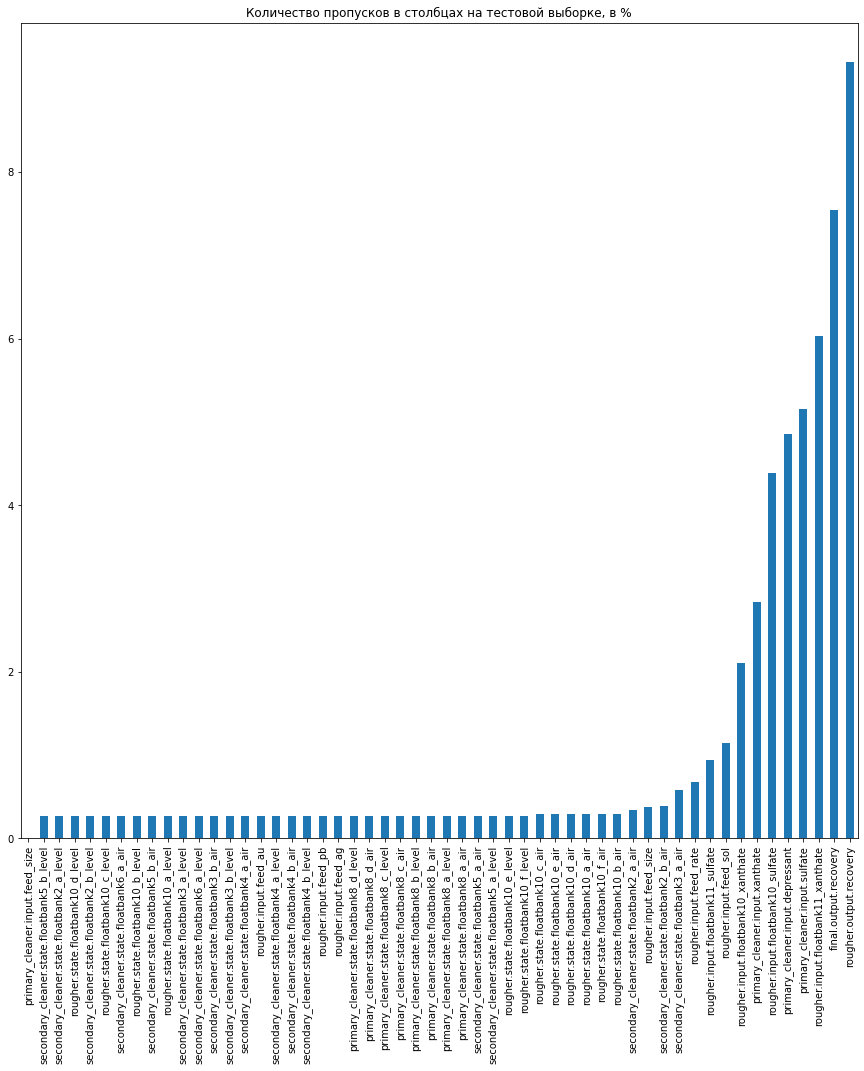

In [15]:
# количество пропусков по столбцам на тестовой выборке % от общей выборки

(100* gold_test.isna().sum()/gold_test.shape[0]).sort_values().\
plot(kind = 'bar',figsize = (15,15), title = 'Количество пропусков в столбцах на тестовой выборке, в %')
plt.show()

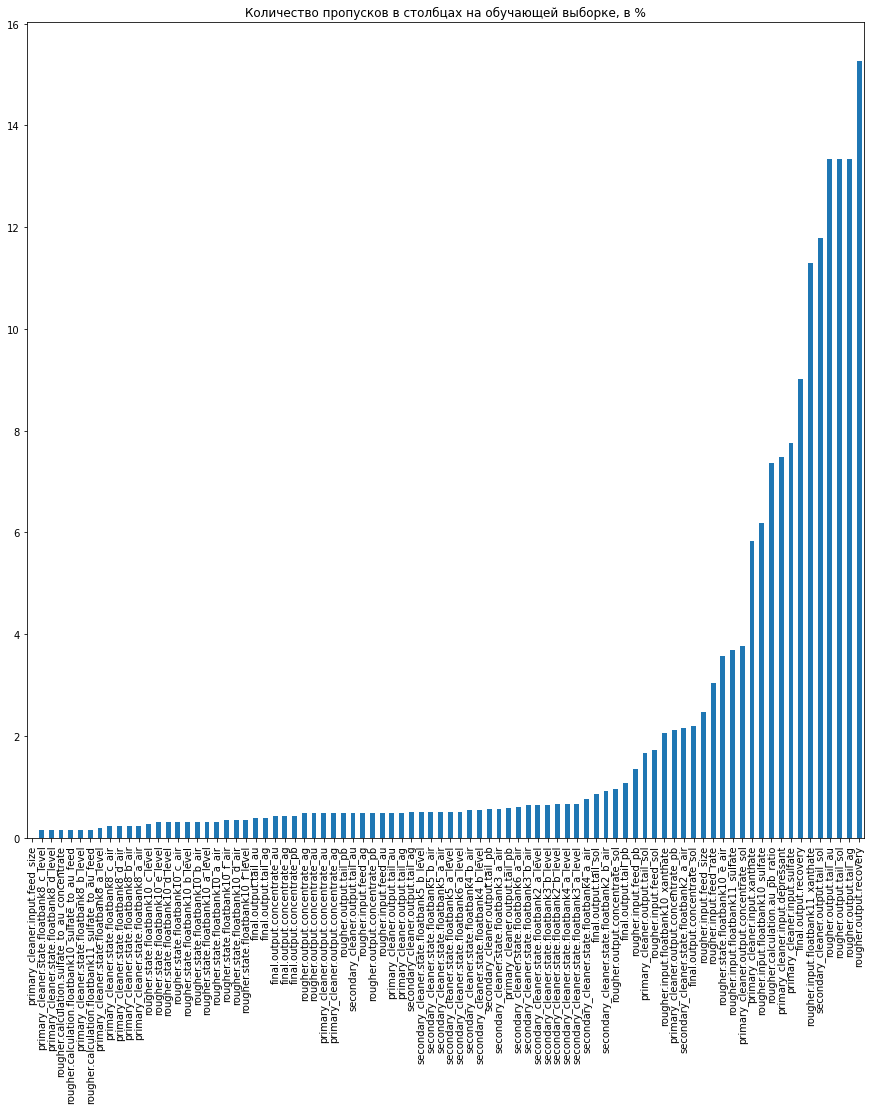

In [16]:
(100* gold_train.isna().sum()/gold_train.shape[0]).sort_values().\
plot(kind = 'bar',figsize = (15,15), title = 'Количество пропусков в столбцах на обучающей выборке, в %')
plt.show()

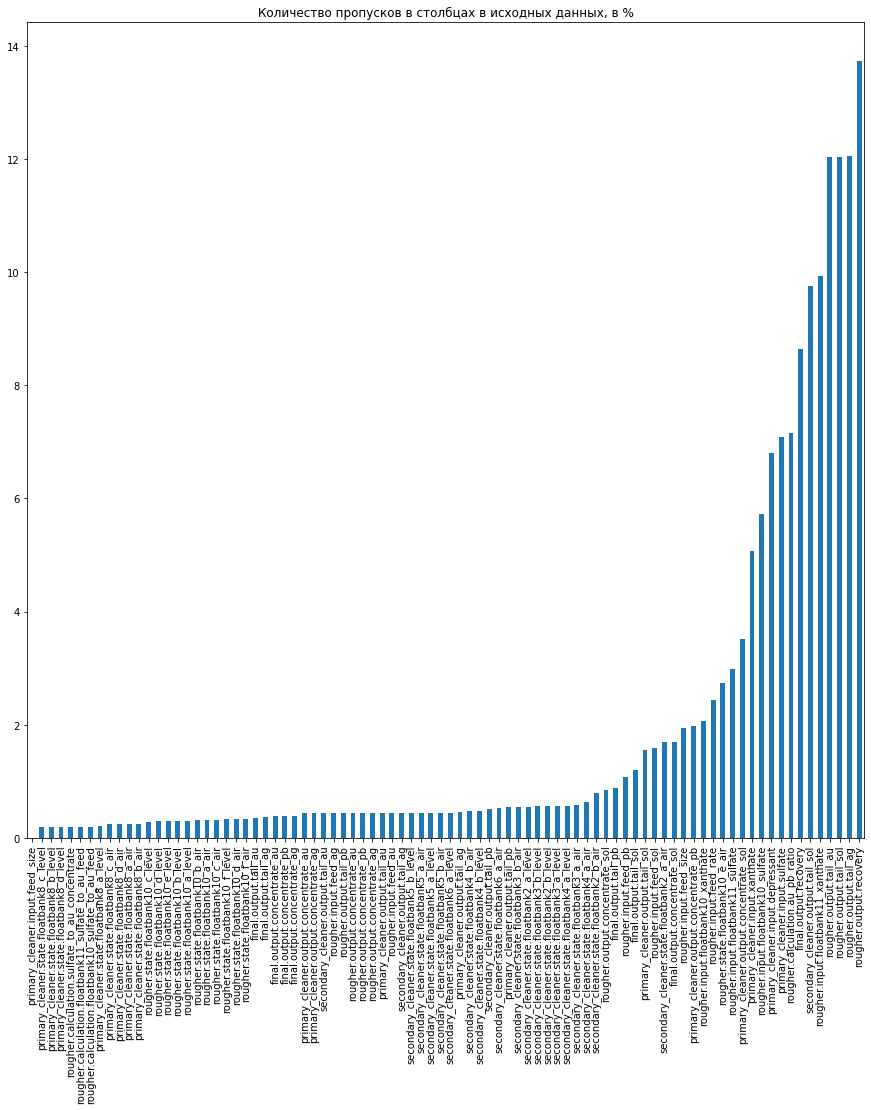

In [17]:
(100* gold_full.isna().sum()/gold_full.shape[0]).sort_values().\
plot(kind = 'bar',figsize = (15,15), title = 'Количество пропусков в столбцах в исходных данных, в %')
plt.show()

Пропуски в целевых признаках просто удалю, так как заполнять их какими либо другими значениями считаю не эффективным, и может привезти к искажениям модели.

In [18]:
#Удаление пропущенных значений целевых признаков в исходных данных.
gold_full.dropna(subset=targets, inplace=True)

In [19]:
#Удаление пропущенных значений целевых признаков в тестовой выборке.
gold_test.dropna(subset=targets, inplace=True)

In [20]:
#Удаление пропущенных значений целевых признаков в обучающей выборке.
gold_train.dropna(subset=targets, inplace=True)

Также удалю из обучающей выборки столбцы, отсутсвующие в тестовой выборке

In [21]:
gold_train = gold_train[gold_test.columns]
gold_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


Остальные признаки заполню методом interpolate(method='time')

In [22]:
gold_train = gold_train.interpolate(method='time')
gold_test = gold_test.interpolate(method='time')
gold_full = gold_full.interpolate(method='time')

In [23]:
#подсчет пропусков
print(gold_train.isna().sum().sum())
print(gold_test.isna().sum().sum())
print(gold_full.isna().sum().sum())

0
0
0


В данных имелось ну очень много пропусков, в целевых признаках выдумывать значения или заменять на что либо не стала, ибо это может исказить модель предсказания, поэтому просто удалила пропуски. А оставшиеся столбцы с пропущенными значениями устранила методом интерполяции.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [24]:
# Выделение данных с концентрациями металлов на основных этапах очистки
stages = ['rougher.input.feed_ag', 
           'rougher.input.feed_pb', 
           'rougher.input.feed_au', 
           'rougher.output.concentrate_ag', 
           'rougher.output.concentrate_pb', 
           'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_pb', 
           'primary_cleaner.output.concentrate_au', 
           'final.output.concentrate_ag', 
           'final.output.concentrate_pb', 
           'final.output.concentrate_au'
           ]

Cначала изображу графически, для наглядности, а далее распишу цифрыми, для точности.

In [25]:
# функция построения графика плотности. Деление идет по этапам (rougher,primary_cleaner,final)
def plot_distplot(df,col1,col2,col3,title): 
    fig = plt.figure(figsize=(10,6))
    sns.distplot(df[col1])
    sns.distplot(df[col2])
    sns.distplot(df[col3])

    fig.legend([col1,col2,col3])
    plt.xlabel(title)
    plt.ylabel('значения параметра')
    plt.show()
    

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

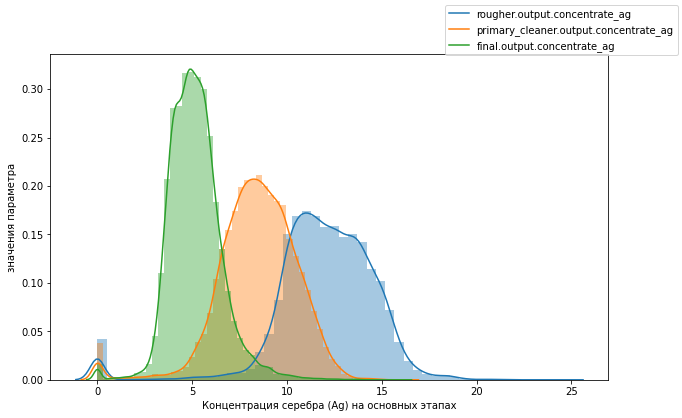

In [26]:
plot_distplot(df = gold_full,
              col1 = 'rougher.output.concentrate_ag',
              col2 = 'primary_cleaner.output.concentrate_ag',
              col3 = 'final.output.concentrate_ag',
              title = 'Концентрация серебра (Ag) на основных этапах',
)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

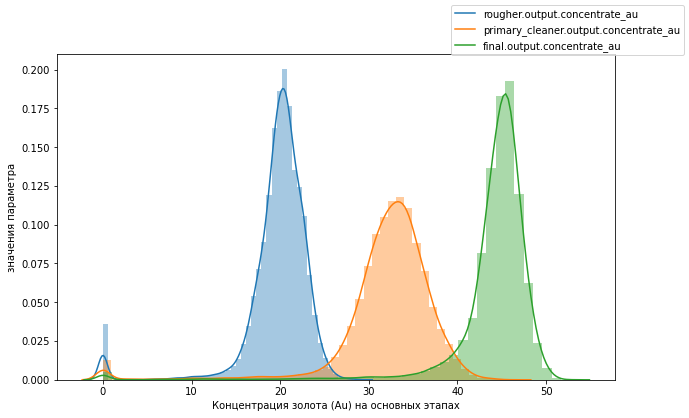

In [27]:
plot_distplot(df = gold_full,
              col1 = 'rougher.output.concentrate_au',
              col2 = 'primary_cleaner.output.concentrate_au',
              col3 = 'final.output.concentrate_au',
              title = 'Концентрация золота (Au) на основных этапах',
)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

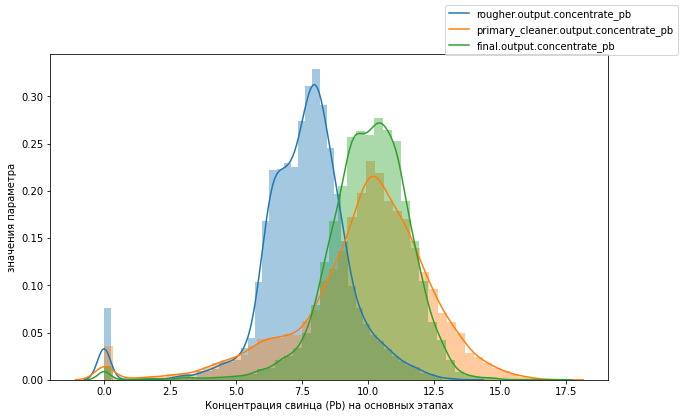

In [28]:
plot_distplot(df = gold_full,
              col1 = 'rougher.output.concentrate_pb',
              col2 = 'primary_cleaner.output.concentrate_pb',
              col3 = 'final.output.concentrate_pb',
              title = 'Концентрация свинца (Pb) на основных этапах',
)

Теперь в цифрах

In [29]:
#выделение только нужных столбцов
metals = gold_full[stages]

In [30]:
#функция, для визуализации средних значений по параметрам
def concentrations(df, metal):
    if metal == 'ag':
        t_metal = 'серебра'
    elif metal == 'pb':
        t_metal = 'свинца'
    elif metal == 'au':
        t_metal = 'золота'
    print(f'Средняя концентрация {t_metal}:')
    print(f'\tисходного сырья = {df[f"rougher.input.feed_{metal}"].mean()}')
    print(f'\tпосле флотации = {df[f"rougher.output.concentrate_{metal}"].mean()}')
    print(f'\tпосле первичного этапа очистки = {df[f"primary_cleaner.output.concentrate_{metal}"].mean()}')
    print(f'\tв финальном концентрате = {df[f"final.output.concentrate_{metal}"].mean()}')

In [31]:
for metal in ('ag', 'au', 'pb'):
    concentrations(metals, metal)

Средняя концентрация серебра:
	исходного сырья = 8.794927425814688
	после флотации = 11.994759359873429
	после первичного этапа очистки = 8.44240807771906
	в финальном концентрате = 5.168384642787276
Средняя концентрация золота:
	исходного сырья = 8.266097326589103
	после флотации = 19.772000139486316
	после первичного этапа очистки = 32.1194004078765
	в финальном концентрате = 44.0765129419528
Средняя концентрация свинца:
	исходного сырья = 3.5854689207191828
	после флотации = 7.606272313195003
	после первичного этапа очистки = 9.810090612931061
	в финальном концентрате = 9.97881902334395


Ag: концентрация серебра в породе с каждым этап падает;

Au: концентрация золота в породе с каждым этап возрастает, часть пустой породы уходит в хвосты. Концентрация от флотации до готового продукта увеличивается более чем в 2,5 раза;

Pb: концентрация свинца увеличивается с каждым этапом.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Построю диаграммы для наглядности.

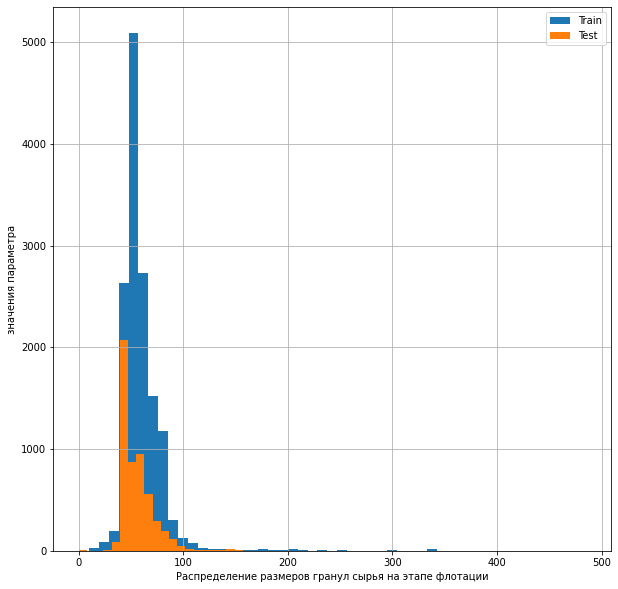

In [32]:
#на этапе флотации
gold_train['rougher.input.feed_size'].hist(bins=50,figsize=(10,10))
gold_test['rougher.input.feed_size'].hist(bins=50)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья на этапе флотации')
plt.ylabel('значения параметра')
plt.show()

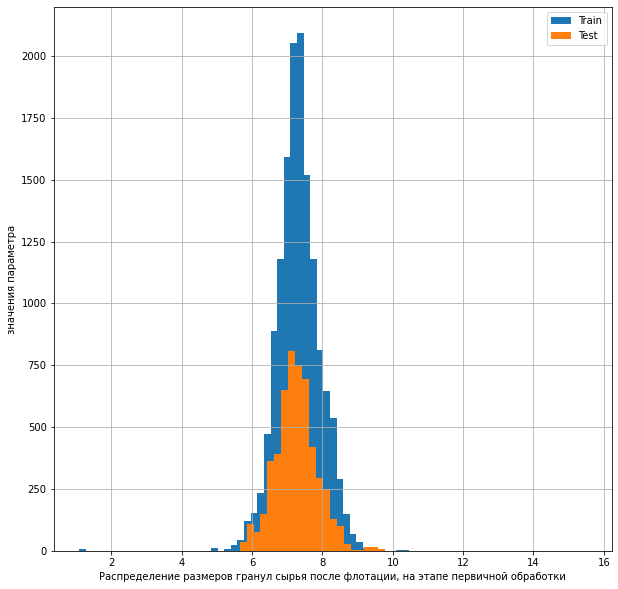

In [33]:
#после флотации, на этапах первичной обработки
gold_train['primary_cleaner.input.feed_size'].hist(bins=50,figsize=(10,10))
gold_test['primary_cleaner.input.feed_size'].hist(bins=50)

plt.legend(['Train','Test'])
plt.xlabel('Распределение размеров гранул сырья после флотации, на этапе первичной обработки')
plt.ylabel('значения параметра')
plt.show()

Размеры гранул в тестовой и обучающей выборке схожи, а значит не повлияет на предсказание модели.

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

В данных имеются выбросы, выходящие за рамки статистически значимых значений, их можно связать с неправильной работой прибора, или же это вовсе не выбросы, а единичные случаи, которые имеют место быть. 

In [34]:
#создание новго датафрейма из концентраций на всех этапах

sum_concentrations = gold_full[stages].copy()
sum_concentrations['final_output_sum'] = sum_concentrations['final.output.concentrate_ag'] + sum_concentrations['final.output.concentrate_pb'] + sum_concentrations['final.output.concentrate_au']
sum_concentrations['rougher_input_sum'] = sum_concentrations['rougher.input.feed_ag'] + sum_concentrations['rougher.input.feed_pb'] + sum_concentrations['rougher.input.feed_au']
sum_concentrations['rougher_output_sum'] = sum_concentrations['rougher.output.concentrate_ag'] + sum_concentrations['rougher.output.concentrate_pb'] + sum_concentrations['rougher.output.concentrate_au']



    



In [35]:
summ = [sum_concentrations['final_output_sum'], sum_concentrations['rougher_input_sum'], sum_concentrations['rougher_output_sum']]

[Text(0.5, 1.0, 'График распределения суммарных концентраций всех веществ на всех стадиях')]

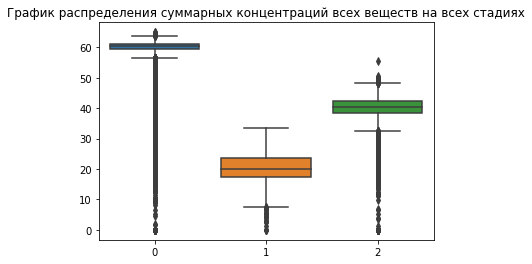

In [36]:
sns.boxplot(data=summ).set(title = 'График распределения суммарных концентраций всех веществ на всех стадиях')

In [37]:
#Удаление нулевых значений
clean_sum = sum_concentrations.loc[sum_concentrations['rougher_output_sum'] >0].copy()
clean_sum = clean_sum.loc[clean_sum['final_output_sum'] > 0]
clean_sum = clean_sum.loc[clean_sum['rougher_input_sum'] > 0]

In [38]:
#По индексам удаление строк с выбросами из тестовой, обучайющей и полной выборок
gold_test.drop(gold_test[~gold_test.index.isin(clean_sum.index)].index, inplace=True)
gold_train.drop(gold_train[~gold_train.index.isin(clean_sum.index)].index, inplace=True)
gold_full.drop(gold_full[~gold_full.index.isin(clean_sum.index)].index, inplace=True)

## Модель

Модели которые я буду использовать: RandomForest, LinearRegression, 

Методом Gridsearch переберу параметры, чтобы найти лучшие.

Протестирую  лучшую модель на тестовой выборке и метрикой Smape оценю результаты результаты.

### Функция для вычисления итоговой sMAPE

In [39]:
#фyнкция вычесления взвешенной sMAPE
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100

Функцию для подсчета итогового значения sMAPE

In [40]:
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) + 0.75 * calculate_smape(target_actual_rougher, target_predictions_rougher)

In [41]:
#выделение независимых и целевых признаков в обучающей выборке
x_train = gold_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
y_train = gold_train[['rougher.output.recovery', 'final.output.recovery']]


In [42]:
#выделение независимых и целевых признаков в тестовой выборке
x_test = gold_test.drop(['final.output.recovery','rougher.output.recovery'], axis=1)
y_test = gold_test[['final.output.recovery','rougher.output.recovery']]

### Поиск модели с параметрами лучшего результата

In [43]:
#параметры, нужные для GridSearchCV
state = RandomState(12345)

pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=state))
])

params = [
    {
        'imp__strategy': ['mean', 'median'],
        'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median'],
        'model': [LinearRegression()]
    }
]

In [44]:
#Метрика smape для scoring'a GridSearchCV
smape_score = make_scorer(calculate_final_smape, greater_is_better=False)

In [45]:
#Кросс валидация с помощью kFold с разделением на 5 частей
cv = KFold(n_splits=5, shuffle=False)
grid_rougher = GridSearchCV(pipe, param_grid=params, cv=cv, scoring=smape_score)

In [46]:
grid_rougher.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=RandomState(MT19937) at 0x7F9C65EA7D40))]),
             param_grid=[{'imp__strategy': ['mean', 'median'],
                          'model': [RandomForestRegressor(max_features=0.5,
                                                          n_estimators=10,
                                                          random_state=RandomState(MT19937) at 0x7F9C65EA7D40)],
                          'model__max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                         {'imp__strategy': ['mean', 'median'],
                          'model': [LinearRegression()]}],
             scoring=make_scorer(calculate_final_smape, greater_is_bett

In [47]:
#Наилучшие подобранные параметры
print('Наилучшие подобранные параметры:', grid_rougher.best_params_)

Наилучшие подобранные параметры: {'imp__strategy': 'mean', 'model': RandomForestRegressor(max_features=0.5, n_estimators=10,
                      random_state=RandomState(MT19937) at 0x7F9C65EA7D40), 'model__max_features': 0.5}


In [48]:
#Наилучший результат
print('Наилучший результат:', -grid_rougher.best_score_)

Наилучший результат: 6.5287880982170705


 Лучший результат дает модель случайного леса с количеством деревьев 10 и глубиной 0.5, sMAPE = 6. 52, эти параметры и буду тестировать.

### Тестирование модели

In [49]:
#Модель с лучшими параметрами для тестовой выборки 
model = RandomForestRegressor(random_state=state, max_depth = 0.5, n_estimators = 10) 
model.fit(x_train, y_train)
predicted_test = model.predict(x_test)


In [50]:
print('sMAPE модели на тестовой выборке:', calculate_final_smape(y_test, predicted_test))

sMAPE модели на тестовой выборке: 5.391357822357106


In [51]:
dummy_model = DummyRegressor(strategy = 'mean')
dummy_model.fit(x_train, y_train)
predicted_dummy = dummy_model.predict(x_test)
print('sMAPE модели на тестовой выборке:', calculate_final_smape(y_test, predicted_dummy))


sMAPE модели на тестовой выборке: 5.378767876637099


Что ж, по результатам тестирования фективной моделью, модель случайного леса всё же лучше(да не на много, но лучше:D)

## Вывод

В данном проекте я должна была построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды. Поиск наилучшей модели и подбором параметров решила произвести с помощью GridSearchCV. Наилучшей моделью для этого проекта стала модель случайного леса с глубиной 0.9 и колличеством деревьев 10. На тестировании модели получила результат sMAPE = 10.39. Далее, после процедуры удаления нулевых значениях в концетрациях6 предсказания модели очень упали и стали 5. 39. Так как в условиях не было сказано, какой результат именно нужно было довиться, считаю, что исследование завершено.